## Exploratory Data Analysis (EDA)

In [20]:
# If you haven't installed or your machine don't have them
# You must statisfy the library requirements before Exploratory Data Analysis
!pip install pandas numpy matplotlib seaborn

In [21]:
# Import all the libraries used for Exploratory Data Analysis
# One of the best practices is that we should import all required libraries at the beginning for cleaner code and readability
import pandas as pd # Analysis
import matplotlib.pyplot as plt # Graphing
import seaborn as sns # Visualization

# Load the dataset
data = pd.read_csv('personal-loan.csv')

In [22]:
# Display the first few rows of the dataset
print(data.head())

   customer_id   age  yrs_experience  family_size           education_level   
0         3815  40.0             9.0          3.0                  Graduate  \
1         5737  65.0            27.0          4.0  Advanced or Professional   
2         4209  61.0             3.0          2.0             Undergraduate   
3         4734  29.0            14.0          1.0             Undergraduate   
4         2551  43.0            23.0          4.0                  Graduate   

   income  mortgage_amt credit_card_acct  credit_card_spend   
0    60.0             0              yes                1.7  \
1    36.0            90               no                0.0   
2   145.0           314               no                0.0   
3    52.0             0               no                0.0   
4    33.0             0               no                0.0   

   share_trading_acct  fixed_deposit_acct online_acct personal_loan  
0                   0                   0         yes            no  
1     

In [23]:
# Get count of missing values
print('Count of missing values:')
print(data.isnull().sum())

Count of missing values:
customer_id             0
age                   380
yrs_experience        364
family_size           385
education_level         0
income                377
mortgage_amt            0
credit_card_acct        0
credit_card_spend       0
share_trading_acct      0
fixed_deposit_acct      0
online_acct             0
personal_loan           0
dtype: int64


In [24]:
# Check the column names in the dataset
# Confirm that it matches with data dictionary
print('Column names:')
print(data.columns)

Column names:
Index(['customer_id', 'age', 'yrs_experience', 'family_size',
       'education_level', 'income', 'mortgage_amt', 'credit_card_acct',
       'credit_card_spend', 'share_trading_acct', 'fixed_deposit_acct',
       'online_acct', 'personal_loan'],
      dtype='object')


In [25]:
# Check the dimensions of the dataset
print('Dimensions:', data.shape)

Dimensions: (6000, 13)


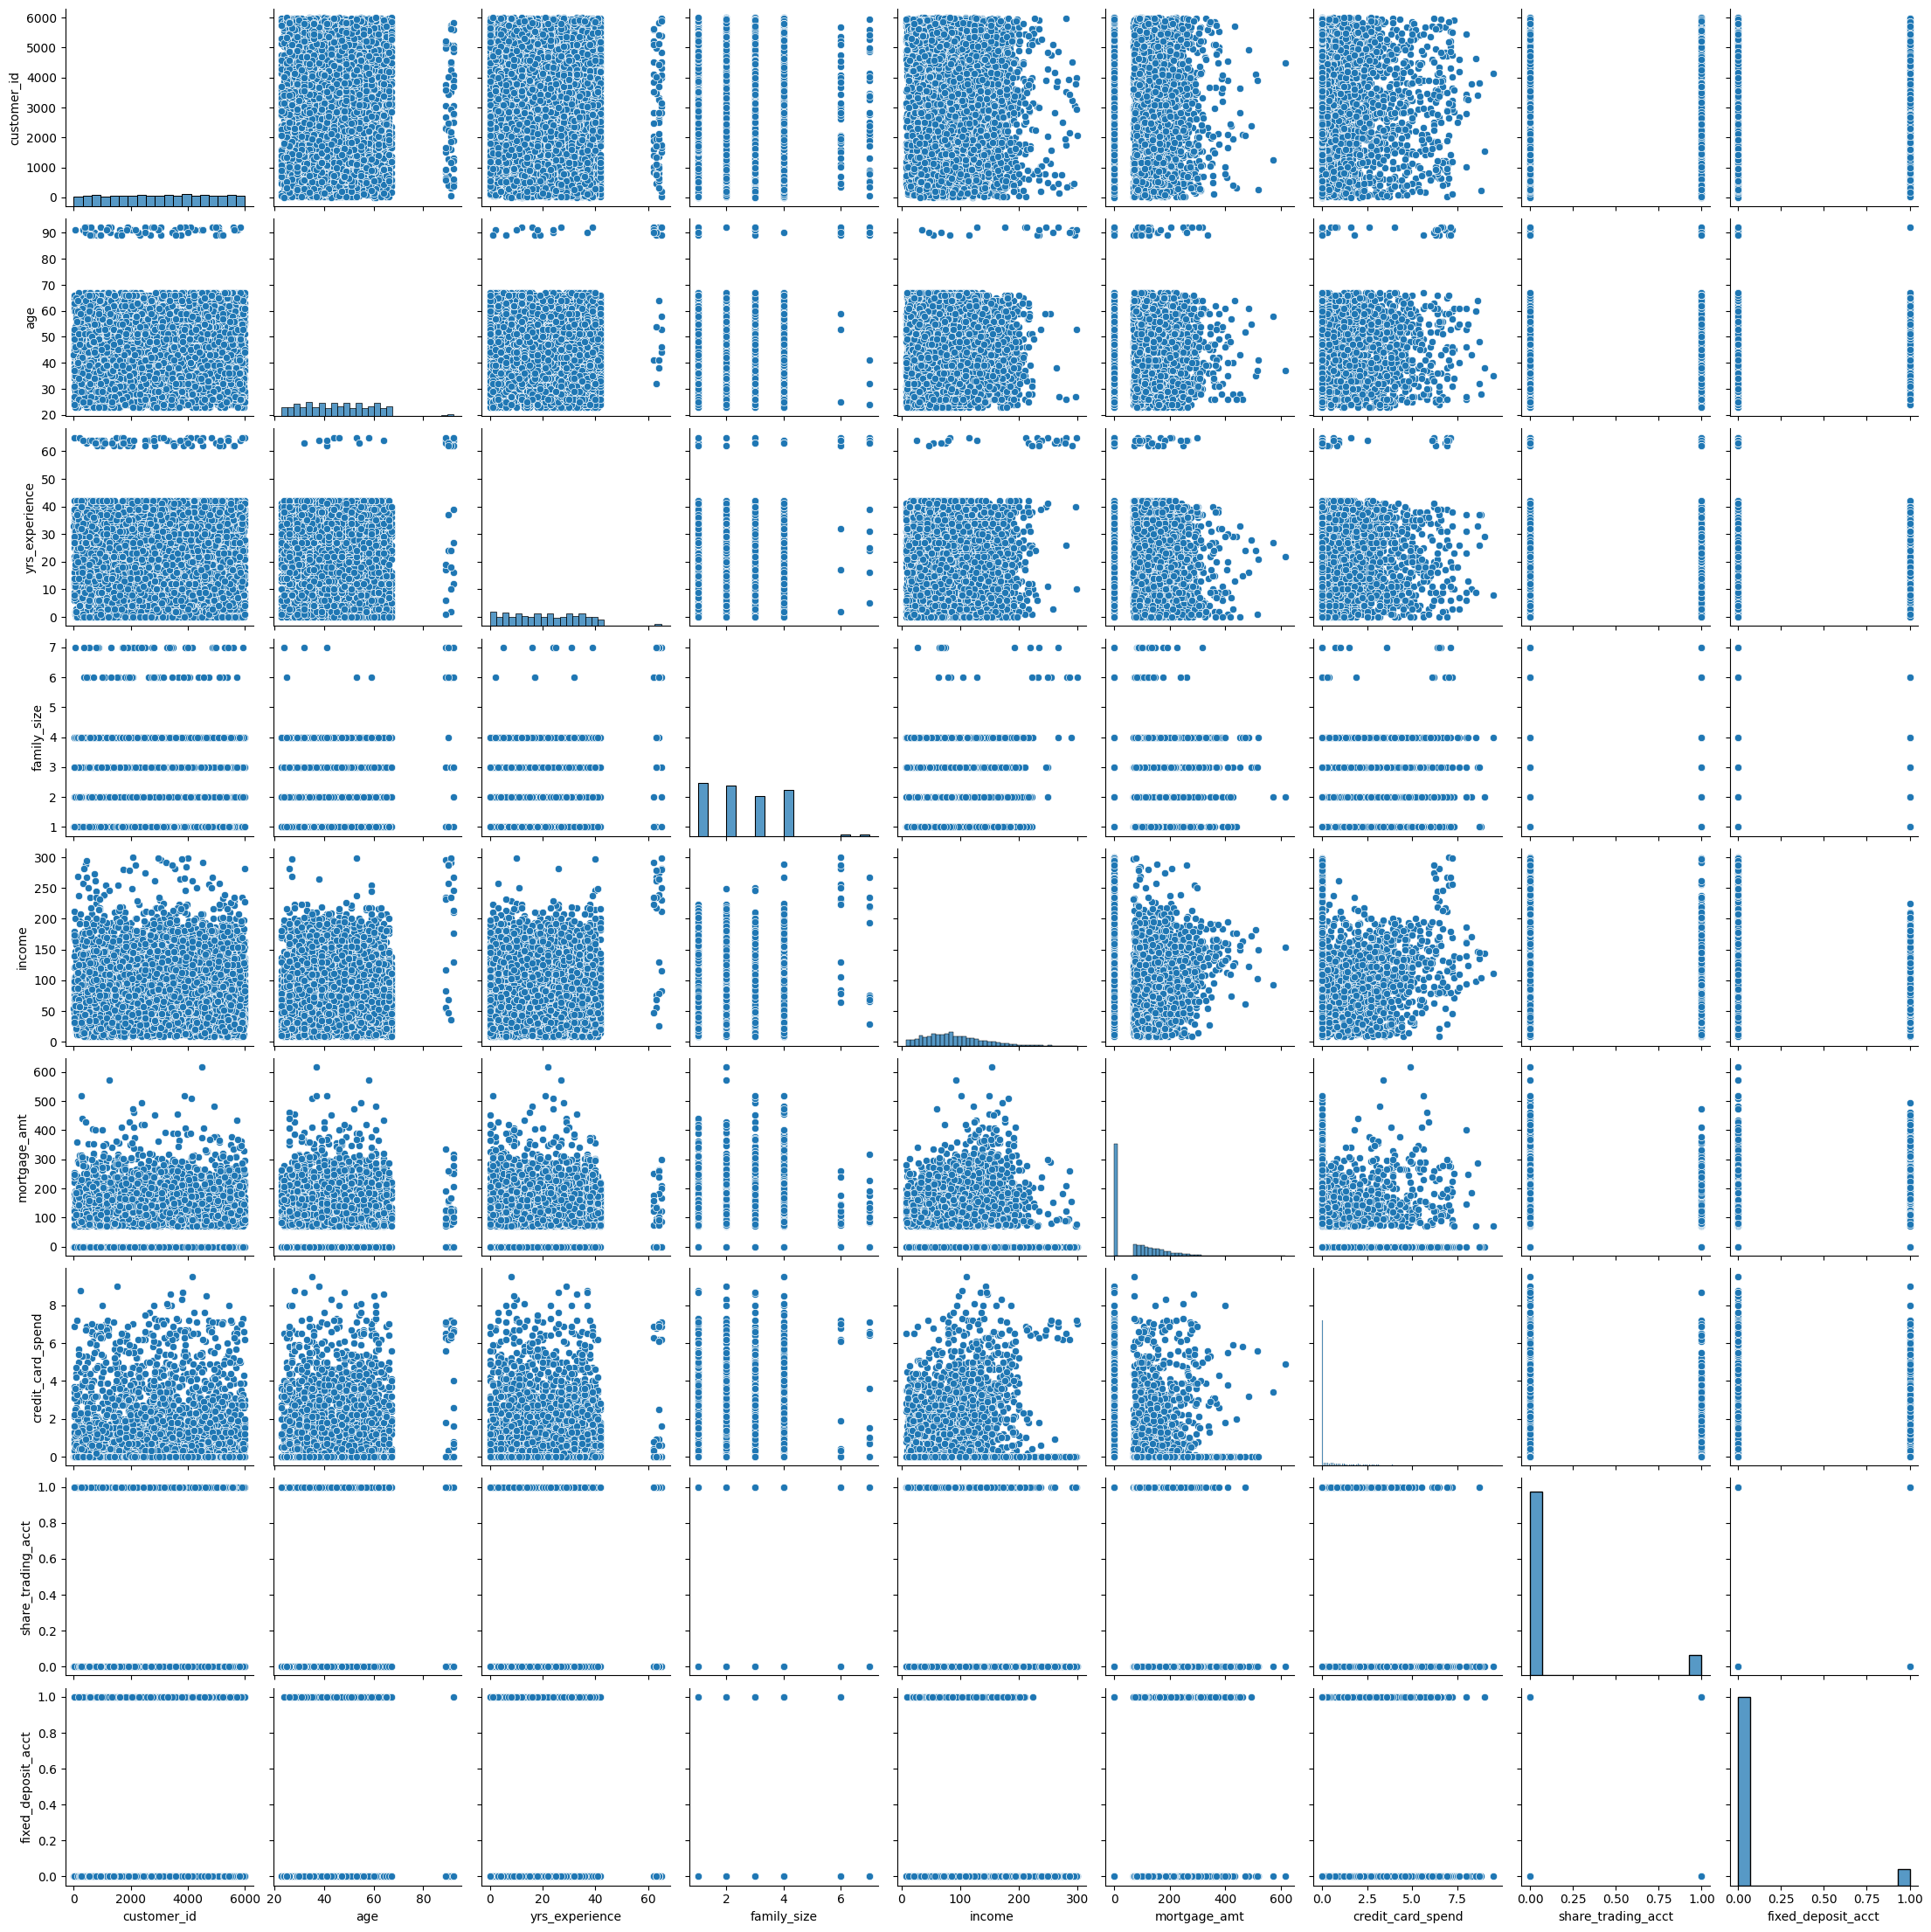

In [26]:
# Relationship between variables
# But can't really understand so much from the output graph...
sns.pairplot(data)
plt.show()

In [27]:

# Check the data types of each variable
print('Data types:')
print(data.dtypes)

Data types:
customer_id             int64
age                   float64
yrs_experience        float64
family_size           float64
education_level        object
income                float64
mortgage_amt            int64
credit_card_acct       object
credit_card_spend     float64
share_trading_acct      int64
fixed_deposit_acct      int64
online_acct            object
personal_loan          object
dtype: object


In [28]:
# Descriptive statistics
print('Summary Statistics:')
print(data.describe())

Summary Statistics:
       customer_id          age  yrs_experience  family_size       income   
count  6000.000000  5620.000000     5636.000000  5615.000000  5623.000000  \
mean   3027.886667    45.556940       21.182221     2.468566    88.143873   
std    1723.488432    13.373778       13.247945     1.215636    48.736053   
min       3.000000    23.000000        0.000000     1.000000     8.000000   
25%    1553.750000    34.000000       10.000000     1.000000    52.000000   
50%    3045.500000    45.000000       21.000000     2.000000    82.000000   
75%    4511.000000    56.000000       32.000000     4.000000   118.000000   
max    6000.000000    92.000000       65.000000     7.000000   300.000000   

       mortgage_amt  credit_card_spend  share_trading_acct  fixed_deposit_acct  
count   6000.000000        6000.000000         6000.000000         6000.000000  
mean      67.585667           0.627467            0.099167            0.078167  
std       88.155099           1.423450     

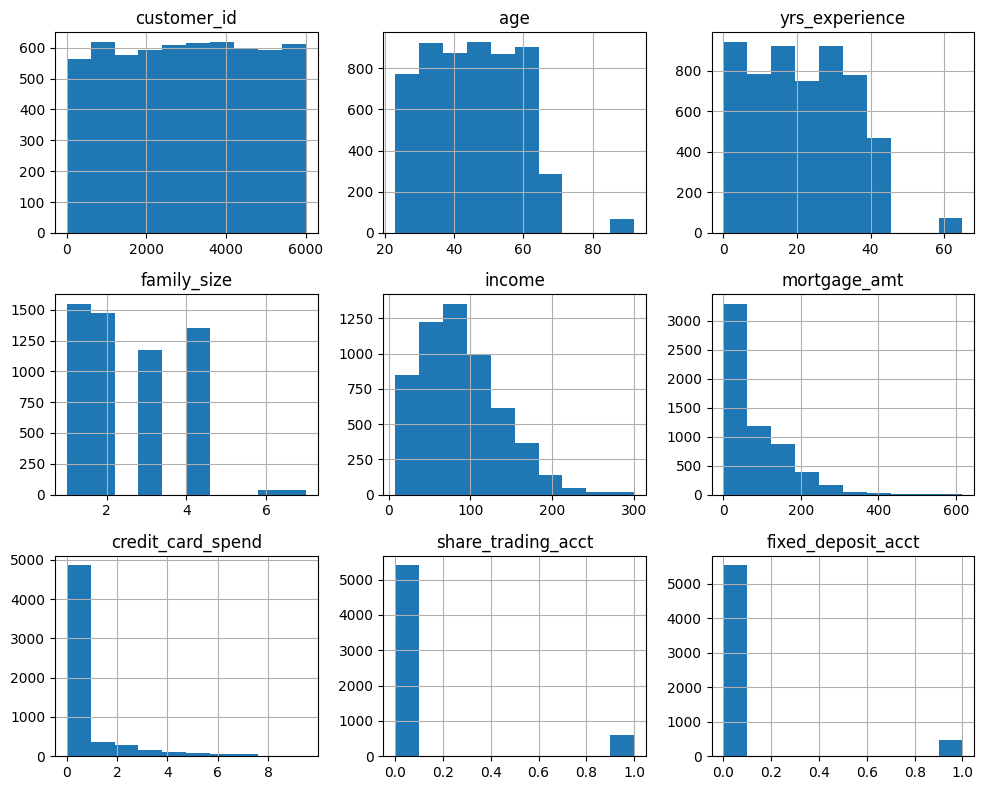

In [29]:
# Distribution of numeric variables
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [30]:
# 'education' column does not  exists in the dataset. 
# So we use the correct column name education_level.
    # Count of unique values for categorical variables
print('Value Counts:')
print(data['education_level'].value_counts())


Value Counts:
education_level
Undergraduate               2455
Advanced or Professional    1818
Graduate                    1727
Name: count, dtype: int64


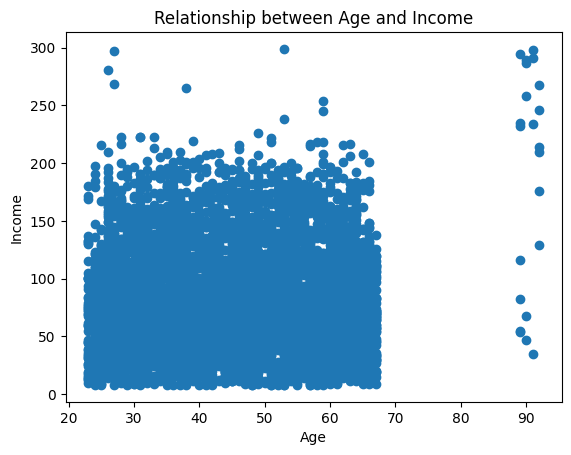

In [31]:
plt.scatter(data['age'], data['income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Relationship between Age and Income')
plt.show()

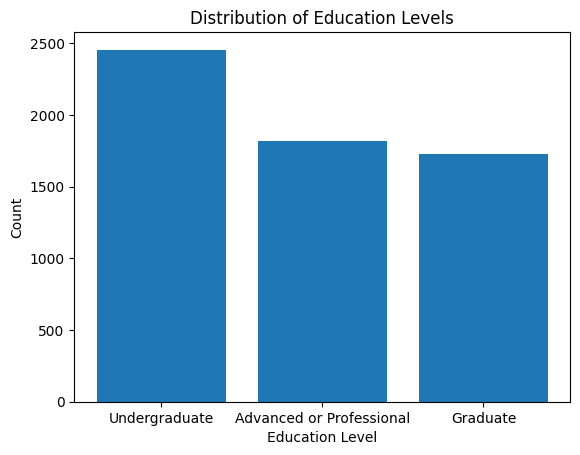

In [32]:
education_counts = data['education_level'].value_counts()
plt.bar(education_counts.index, education_counts.values)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')
plt.show()


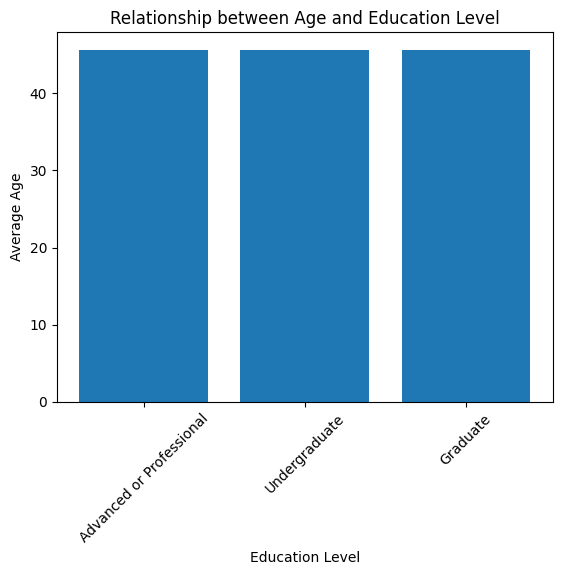

In [33]:
# Grouping the data by education level and calculating the average age for each group
age_by_education = data.groupby('education_level')['age'].mean().sort_values()

# Creating a bar plot to visualize the relationship between age and education level
plt.bar(age_by_education.index, age_by_education.values)
plt.xlabel('Education Level')
plt.ylabel('Average Age')
plt.title('Relationship between Age and Education Level')
plt.xticks(rotation=45)
plt.show()

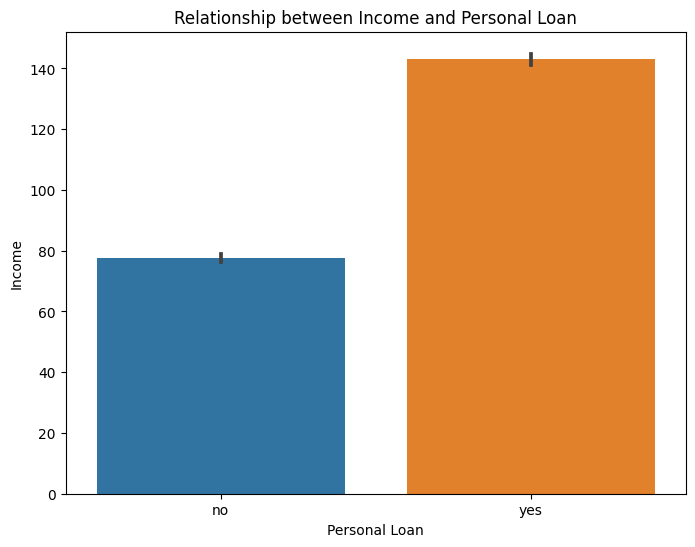

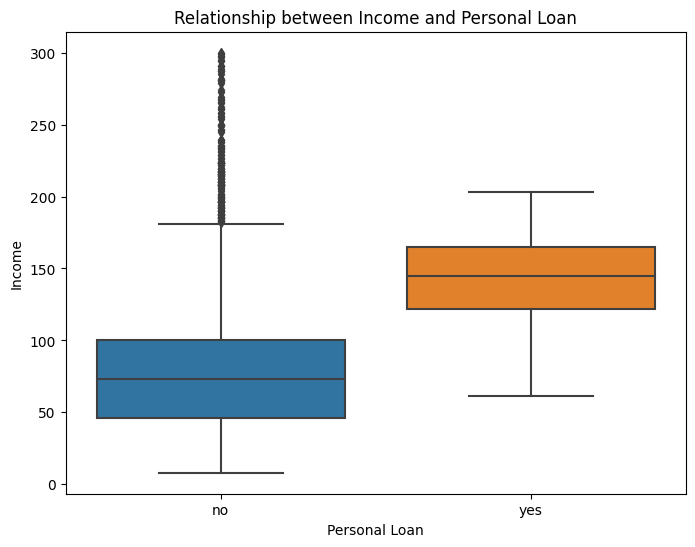

In [34]:
# Create a DataFrame from the data
df = pd.DataFrame(data)

# Remove rows with missing values
df = df.dropna(subset=['income', 'personal_loan'])

# Convert 'income' column to numeric type
df['income'] = pd.to_numeric(df['income'])

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='personal_loan', y='income')
plt.xlabel('Personal Loan')
plt.ylabel('Income')
plt.title('Relationship between Income and Personal Loan')
plt.show()

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='personal_loan', y='income')
plt.xlabel('Personal Loan')
plt.ylabel('Income')
plt.title('Relationship between Income and Personal Loan')
plt.show()

In [35]:
# Calculate the proportion of customers with personal loans
loan_counts = df['personal_loan'].value_counts()
loan_proportion = loan_counts / loan_counts.sum()
print(loan_proportion)

personal_loan
no     0.839943
yes    0.160057
Name: count, dtype: float64


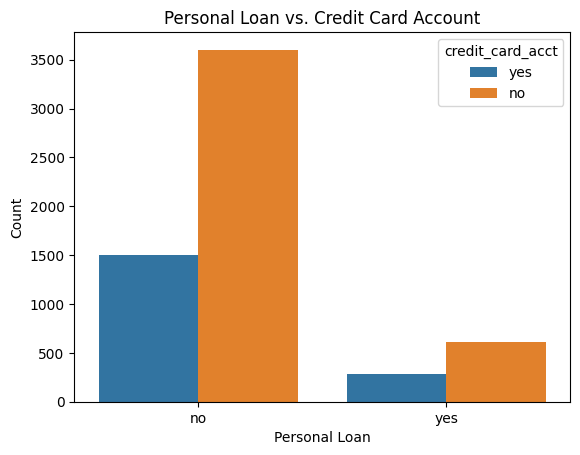

In [36]:
# Personal Loan vs. Credit Card Account
sns.countplot(x='personal_loan', hue='credit_card_acct', data=data)
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.title('Personal Loan vs. Credit Card Account')
plt.show()

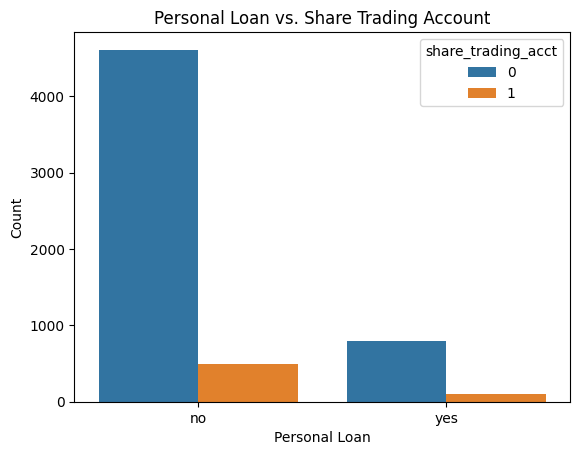

In [37]:
# Personal Loan vs. Share Trading Account
sns.countplot(x='personal_loan', hue='share_trading_acct', data=data)
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.title('Personal Loan vs. Share Trading Account')
plt.show()

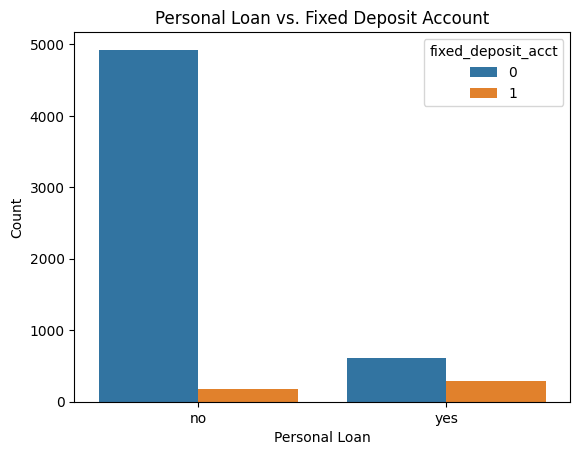

In [38]:
# Personal Loan vs. Fixed Deposit Account
sns.countplot(x='personal_loan', hue='fixed_deposit_acct', data=data)
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.title('Personal Loan vs. Fixed Deposit Account')
plt.show()